In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions

In [2]:
O_df = pd.read_csv('covid-vaccination-vs-death_ratio.csv', index_col = 'Unnamed: 0')
O_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809


In [3]:
df = O_df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32911 entries, 0 to 32910
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  32911 non-null  object 
 1   iso_code                 32911 non-null  object 
 2   date                     32911 non-null  object 
 3   total_vaccinations       32911 non-null  float64
 4   people_vaccinated        32911 non-null  float64
 5   people_fully_vaccinated  32911 non-null  float64
 6   New_deaths               32911 non-null  int64  
 7   population               32911 non-null  float64
 8   ratio                    32911 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.5+ MB


In [5]:
df.describe(include = 'object')

,country,iso_code,date
count,32911,32911,32911
unique,197,197,472
top,United States of America,USA,2021-08-09
freq,471,471,110


In [6]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,3.291100e+04,3.291100e+04,3.291100e+04,32911.000000,3.291100e+04,32911.000000
mean,3.689489e+07,2.035846e+07,1.471013e+07,100.043116,5.164060e+07,41.971287
std,1.411509e+08,7.843235e+07,5.735093e+07,339.500099,1.645294e+08,28.970518
min,1.000000e+00,1.000000e+00,1.000000e+00,-2440.000000,1.373000e+03,0.000011
25%,7.289180e+05,4.571090e+05,2.313500e+05,1.000000,2.962425e+06,13.697569
50%,4.552479e+06,2.724528e+06,1.693674e+06,9.000000,1.034057e+07,41.530473
75%,2.065201e+07,1.158203e+07,7.907290e+06,49.000000,3.826123e+07,68.147335
max,3.243599e+09,1.275541e+09,1.240777e+09,11447.000000,1.447065e+09,124.737373


In [7]:
len(df.country.unique())

197

In [8]:
df['date'] = pd.to_datetime(df.date,format = '%Y-%m-%d')
df['date'] = [date.strftime('%YW%W',) for date in df.date]
df = df.groupby(by = ['country', 'iso_code', 'date']).max().reset_index()

In [9]:
len(df.country.unique())

197

In [10]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021W19,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,Afghanistan,AFG,2021W20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,Afghanistan,AFG,2021W21,600152.0,480226.0,119926.0,20,40374668.0,1.189424
3,Afghanistan,AFG,2021W22,630305.0,481800.0,148505.0,34,40374668.0,1.193323
4,Afghanistan,AFG,2021W23,641295.0,482952.0,158343.0,64,40374668.0,1.196176
...,...,...,...,...,...,...,...,...,...
7994,"occupied Palestinian territory, including east...",PSE,2021W46,2974583.0,1886212.0,1339710.0,3,5293440.0,35.633010
7995,"occupied Palestinian territory, including east...",PSE,2021W47,3024477.0,1910794.0,1365858.0,5,5293440.0,36.097396
7996,"occupied Palestinian territory, including east...",PSE,2022W09,3609984.0,1979151.0,1716216.0,7,5293440.0,37.388749
7997,"occupied Palestinian territory, including east...",PSE,2022W11,3677892.0,1991893.0,1747035.0,6,5293440.0,37.629462


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  7999 non-null   object 
 1   iso_code                 7999 non-null   object 
 2   date                     7999 non-null   object 
 3   total_vaccinations       7999 non-null   float64
 4   people_vaccinated        7999 non-null   float64
 5   people_fully_vaccinated  7999 non-null   float64
 6   New_deaths               7999 non-null   int64  
 7   population               7999 non-null   float64
 8   ratio                    7999 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 562.6+ KB


In [12]:
# Al haber agrupado cogiendo el máximo valor, el número de nuevas muertes no era el correcto.
# Por lo tanto, creo una lista para sustituir ese valor, por el correcto.

# Copio el dataset original, y agrupo el dataset sumando la columna de nuevas muertes.

from datetime import datetime

deaths_df = O_df.copy()
deaths_df['date'] = pd.to_datetime(deaths_df.date,format = '%Y-%m-%d')
deaths_df['date'] = [date.strftime('%YW%W') for date in deaths_df.date]
deaths_df = deaths_df.groupby(by = ['country', 'iso_code', 'date'])['New_deaths'].sum().reset_index()
deaths_list = deaths_df['New_deaths']
df['New_deaths'] = deaths_list

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  7999 non-null   object 
 1   iso_code                 7999 non-null   object 
 2   date                     7999 non-null   object 
 3   total_vaccinations       7999 non-null   float64
 4   people_vaccinated        7999 non-null   float64
 5   people_fully_vaccinated  7999 non-null   float64
 6   New_deaths               7999 non-null   int64  
 7   population               7999 non-null   float64
 8   ratio                    7999 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 562.6+ KB


In [14]:
#Creo una nueva columna que tenga el número de muertes acumuladas

df['Death_Cum'] = df.groupby(['country', 'iso_code'])['New_deaths'].cumsum()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  7999 non-null   object 
 1   iso_code                 7999 non-null   object 
 2   date                     7999 non-null   object 
 3   total_vaccinations       7999 non-null   float64
 4   people_vaccinated        7999 non-null   float64
 5   people_fully_vaccinated  7999 non-null   float64
 6   New_deaths               7999 non-null   int64  
 7   population               7999 non-null   float64
 8   ratio                    7999 non-null   float64
 9   Death_Cum                7999 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 625.0+ KB


In [16]:
len(df.country.unique())

197

## Análisis

In [17]:
# Vamos a coger un sample con un sólo país y analizarlo. El país elegido va a ser España

Sample_df = df[df ['country'] == 'Spain']
print(Sample_df.shape)
Sample_df.head()

(62, 10)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,Death_Cum
6885,Spain,ESP,2021W03,1237593.0,1148895.0,88698.0,2668,46736811.0,2.458223,2668
6886,Spain,ESP,2021W04,1609261.0,1251369.0,357892.0,2606,46736811.0,2.677480,5274
6887,Spain,ESP,2021W05,2105033.0,1318626.0,786407.0,2525,46736811.0,2.821386,7799
6888,Spain,ESP,2021W06,2561608.0,1491517.0,1070091.0,1961,46736811.0,3.191311,9760
6889,Spain,ESP,2021W07,3090351.0,1893290.0,1197061.0,1350,46736811.0,4.050961,11110


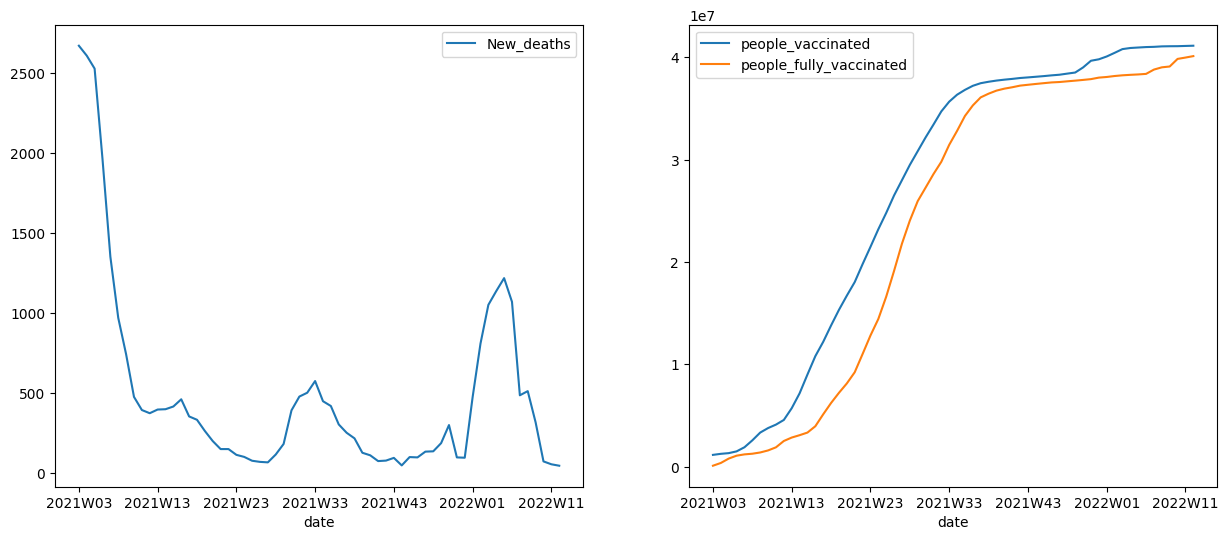

In [42]:
# Vamos a comparar las nuevas muertes con el número de vacunados parcial y totalmente, para España
 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
Sample_df.plot(x = 'date', y = 'New_deaths', ax = ax[0])
Sample_df.plot(x = 'date', y = 'people_vaccinated', ax = ax[1])
Sample_df.plot(x = 'date', y = 'people_fully_vaccinated', ax = ax[1])
#plt.title('New deaths evolution', loc='left')
#plt.title('New vaccinated evolution', loc='right')
plt.show()

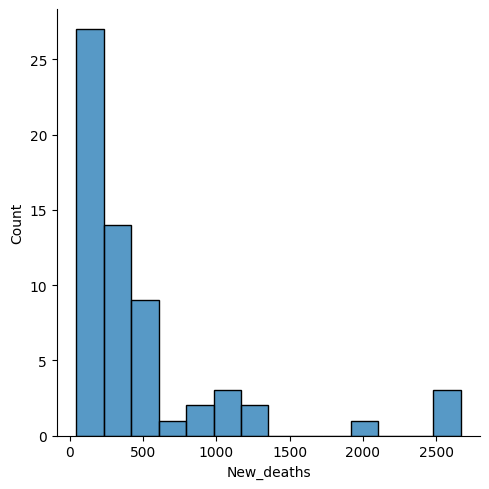

In [47]:
sns.displot(data = Sample_df, x = 'New_deaths')
plt.show()

Fitting 9 distributions: 100%|██████████| 9/9 [00:01<00:00,  8.61it/s]


{'beta': {'a': 0.6534151488622637, 'b': 119.25906663620799, 'loc': 43.99999999999999, 'scale': 71073.97063147984}}


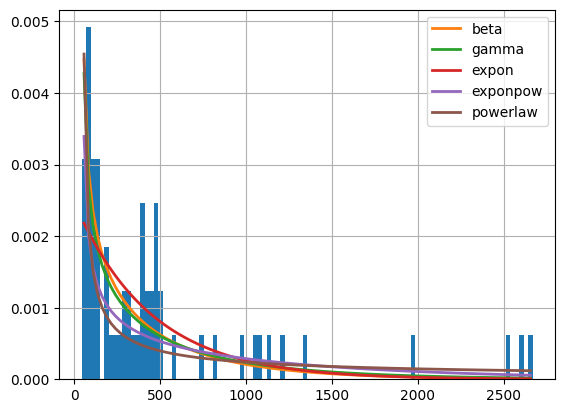

In [54]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(Sample_df.New_deaths, distributions = distribuciones)
fitter.fit()
fitter.summary(Nbest = 5, plot = True,)
print(fitter.get_best())